In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Titanic Dataset
df = pd.read_csv("Titanic-Dataset.csv")

# Display the first few rows of the dataset
df.head()

: 

In [ ]:
df.tail()

: 

In [ ]:
df.describe()

: 

In [ ]:
df.info()

: 

In [ ]:
print(df.columns)

: 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Titanic Dataset
df = pd.read_csv("Titanic-Dataset.csv")

# Display the first few rows of the dataset
df.head()
# Explore and Preprocess Data
df.isnull().sum()

# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)

# Check if 'Cabin' column exists before dropping
if 'Cabin' in df.columns:
    df.drop(['Cabin'], axis=1, inplace=True)  # Drop 'Cabin' column due to many missing values

# Convert categorical variables to numerical
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)  # Note the change in case for 'embarked'

# Feature selection
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']  # Note the change in case for 'embarked'
X = df[features]
y = df['Survived']

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build and Train the Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


: 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic Dataset
df = pd.read_csv("Titanic-Dataset.csv")

# Scatter Plot: Age vs. Fare
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title('Scatter Plot: Age vs. Fare')
plt.show()

: 

In [ ]:
# Bar Graph: Survival Count
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

: 

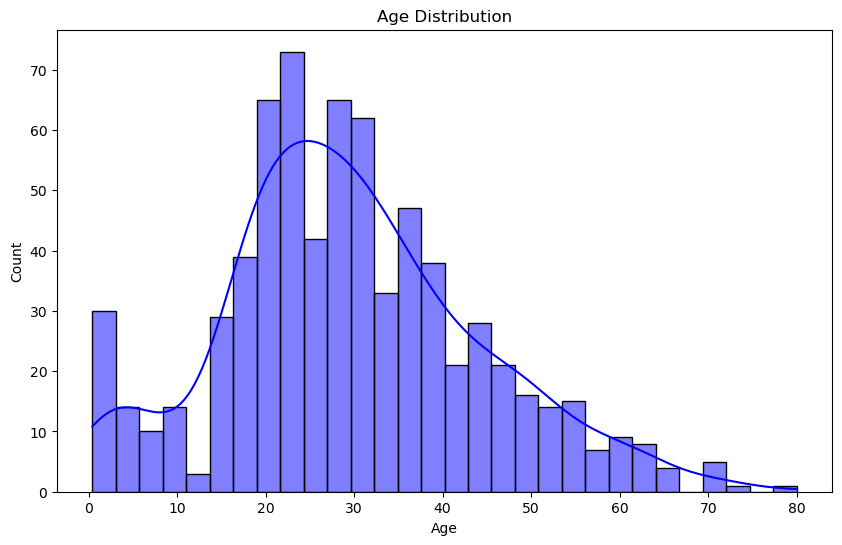

In [49]:
#Histogram: Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), bins=30, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

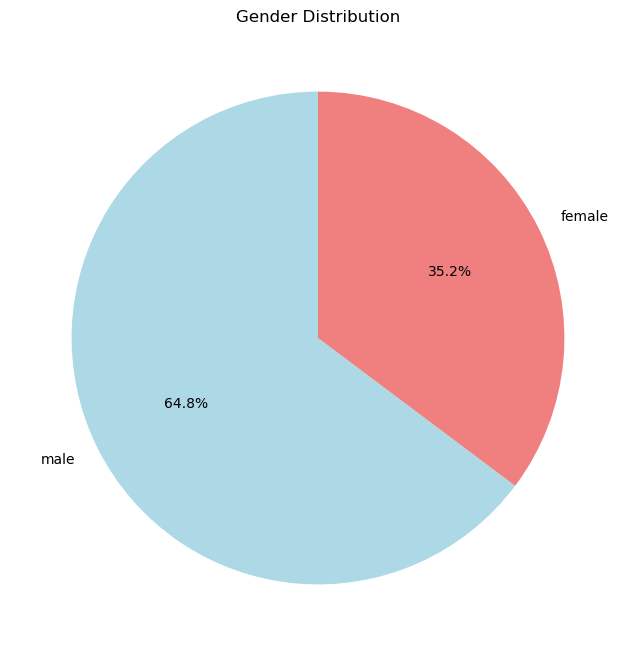

In [50]:
# Pie Chart: Gender Distribution
plt.figure(figsize=(8, 8))
gender_distribution = df['Sex'].value_counts()
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.show()